In [ ]:
try :
    import geopandas as gpd
except ImportError:
    print("geopandas를 설치해주세요.")
    !pip install geopandas
    import geopandas as gpd
    
# Shapefile 파일 경로
shapefile_path = 'data/BND_ADM_DONG_PG.shp'

# Shapefile 불러오기
gdf = gpd.read_file(shapefile_path)

# 컬럼명 확인
print(gdf.columns)


Index(['BASE_DATE', 'ADM_CD', 'ADM_NM', 'geometry'], dtype='object')


In [34]:
gdf.columns

Index(['BASE_DATE', 'ADM_CD', 'ADM_NM', 'geometry'], dtype='object')

In [35]:
# 'ADM_CD'가 '11050'으로 시작하는 행정구역만 필터링
gwangjin_gu = gdf[gdf['ADM_CD'].str.startswith('11050')]
gwangjin_gu.reset_index(drop=True, inplace=True)
gwangjin_gu.index = gwangjin_gu.index + 1
gwangjin_gu

,BASE_DATE,ADM_CD,ADM_NM,geometry
1,20240630,11050580,중곡4동,"POLYGON ((208912.273 552695.751, 208912.278 55..."
2,20240630,11050630,광장동,"POLYGON ((210181.156 550810.039, 210180.969 55..."
3,20240630,11050640,자양1동,"POLYGON ((207388.944 548559.657, 207395.800 54..."
4,20240630,11050650,자양2동,"POLYGON ((208070.849 547611.360, 208069.611 54..."
5,20240630,11050530,화양동,"POLYGON ((206550.617 549758.954, 206554.414 54..."
6,20240630,11050540,군자동,"POLYGON ((207023.139 550852.579, 207023.092 55..."
7,20240630,11050550,중곡1동,"POLYGON ((207364.668 551633.493, 207364.629 55..."
8,20240630,11050560,중곡2동,"POLYGON ((207679.276 551556.081, 207679.284 55..."
9,20240630,11050570,중곡3동,"POLYGON ((206908.383 552483.641, 206916.458 55..."
10,20240630,11050590,능동,"POLYGON ((207024.085 550852.118, 207069.592 55..."


In [36]:
# CRS(좌표계) 변환: 기존 좌표계를 WGS84로 변환
gwangjin_gu = gwangjin_gu.to_crs(epsg=4326)

# 변환된 위도/경도 값을 새로운 컬럼으로 추가
gwangjin_gu['latitude'] = gwangjin_gu.geometry.centroid.y
gwangjin_gu['longitude'] = gwangjin_gu.geometry.centroid.x

gwangjin_gu


c:\Users\JeongJin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
c:\Users\JeongJin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,BASE_DATE,ADM_CD,ADM_NM,geometry,latitude,longitude
1,20240630,11050580,중곡4동,"POLYGON ((127.10089 37.57376, 127.10089 37.573...",37.563874,127.094494
2,20240630,11050630,광장동,"POLYGON ((127.11523 37.55676, 127.11522 37.556...",37.547823,127.104714
3,20240630,11050640,자양1동,"POLYGON ((127.08360 37.53651, 127.08368 37.536...",37.535591,127.080454
4,20240630,11050650,자양2동,"POLYGON ((127.09131 37.52796, 127.09129 37.527...",37.529103,127.082752
5,20240630,11050530,화양동,"POLYGON ((127.07413 37.54732, 127.07417 37.547...",37.543244,127.073201
6,20240630,11050540,군자동,"POLYGON ((127.07949 37.55717, 127.07948 37.557...",37.553043,127.073708
7,20240630,11050550,중곡1동,"POLYGON ((127.08336 37.56421, 127.08336 37.564...",37.562100,127.077685
8,20240630,11050560,중곡2동,"POLYGON ((127.08692 37.56351, 127.08692 37.563...",37.558909,127.084579
9,20240630,11050570,중곡3동,"POLYGON ((127.07820 37.57187, 127.07829 37.571...",37.567911,127.082017
10,20240630,11050590,능동,"POLYGON ((127.07950 37.55717, 127.08001 37.556...",37.550591,127.081791


In [37]:

from matplotlib import font_manager#

#  Shapefile로 저장
gwangjin_gu.to_file('./make_file/gwangjin_boundary.shp')

# 한글 폰트 설정 (시스템에 맞는 폰트로 설정)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 예시로 Windows에서의 맑은 고딕 폰트 경로
prop = font_manager.FontProperties(fname=font_path)


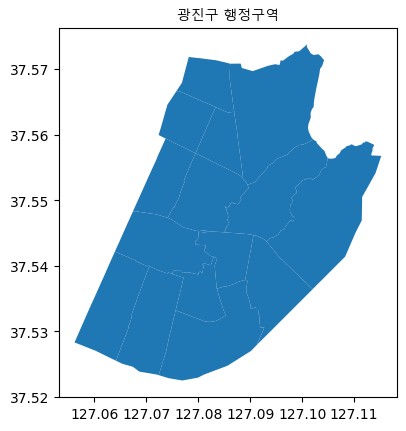

In [39]:
# 시각화
gwangjin_gu.plot()
plt.title("광진구 행정구역", fontproperties=prop)
plt.savefig('./make_file/광진구 경계선.png')
plt.show()